In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Charger les données
df = pd.read_csv('../data/cleaned/voitures_aramisauto_nettoye.csv')
# Afficher les 5 premières lignes pour vérifier les données
df.head()

,Marque,Modèle,Année,Kilométrage,Etat,Prix,Type de Carburant,Transmission
0,Mercedes,Classe A,2023,5245.0,Occasion,35999.0,Diesel,Auto.
1,Peugeot,208,2023,20.0,Occasion,26999.0,Électrique,Auto.
2,Opel,Mokka,2023,1675.0,Occasion,26799.0,Électrique,Auto.
3,Toyota,YARIS CROSS,2022,5810.0,Occasion,24999.0,Hybride,Auto.
4,Peugeot,2008,2024,8702.0,Occasion,23699.0,Essence,Auto.


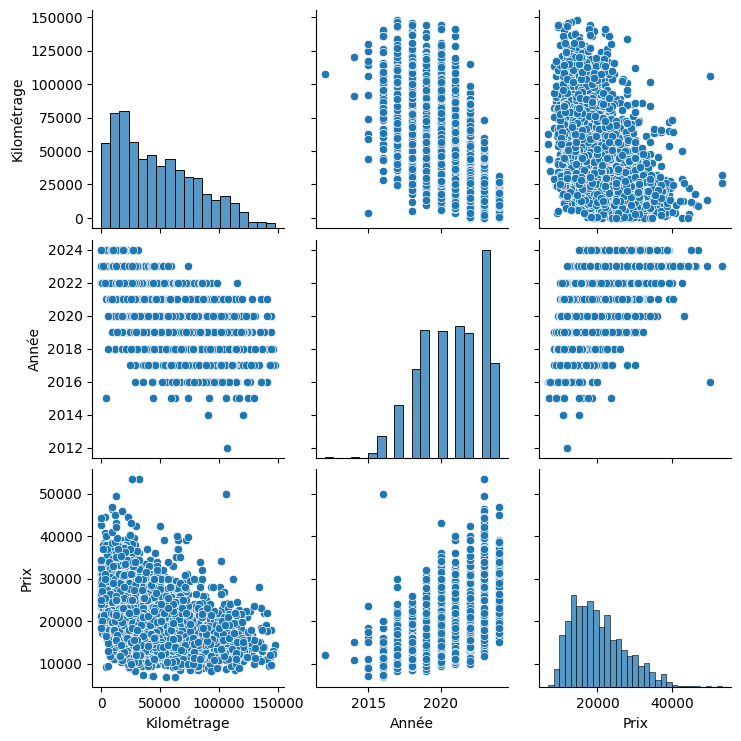

In [3]:
# Visualisation initiale des données
try:
    sns.pairplot(df[['Kilométrage', 'Année', 'Prix']])
    plt.show()
except Exception as e:
    print(f"Erreur lors de la création du pairplot: {e}")
    # Afficher les graphiques séparés si le pairplot échoue
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    sns.histplot(df['Kilométrage'], ax=axes[0], kde=True)
    axes[0].set_title("Distribution du Kilométrage")
    sns.histplot(df['Année'], ax=axes[1], kde=True)
    axes[1].set_title("Distribution des Années")
    sns.histplot(df['Prix'], ax=axes[2], kde=True)
    axes[2].set_title("Distribution des Prix")
    plt.tight_layout()
    plt.show()

In [4]:
# Définir X et y pour la régression linéaire
X = df[['Kilométrage', 'Année']]
y = df['Prix']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [6]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nRégression linéaire :\nMSE : {mse:.2f}\nR² : {r2:.2f}")


Régression linéaire :
MSE : 33698578.65
R² : 0.31


In [7]:
# Cross-validation pour une évaluation plus robuste
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Scores de validation croisée R² : {cv_scores}")
print(f"R² moyen (cross-validation) : {cv_scores.mean():.2f}")

Scores de validation croisée R² : [0.34757873 0.33334607 0.347295   0.4027846  0.36368143]
R² moyen (cross-validation) : 0.36


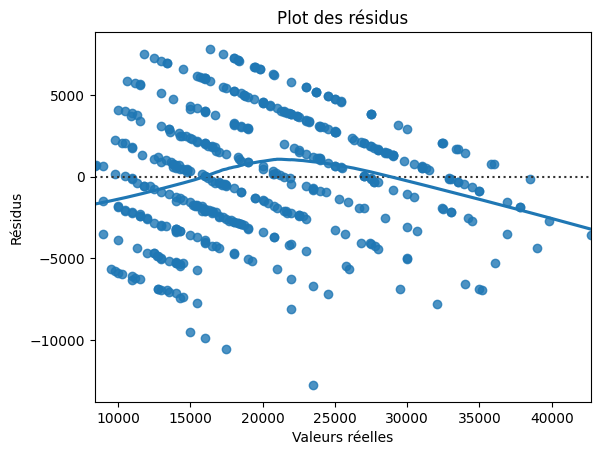

In [8]:
# Courbe des résidus
sns.residplot(x=y_test, y=y_pred, lowess=True)
plt.xlabel('Valeurs réelles')
plt.ylabel('Résidus')
plt.title('Plot des résidus')
plt.show()